# Titanic

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



## Expected steps:

1. Check each and every feature and try to extract value from it
2. Do one-hot encoding for all unordered categorical features

In [473]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import shapiro
import math

# Ignoring all warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth',3000)



In [394]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender = pd.read_csv('gender_submission.csv')

In [395]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## EDA

In [396]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [397]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [398]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### <b>Pclass </b>
Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd

[Text(0, 0, '491'), Text(0, 0, '216'), Text(0, 0, '184')]

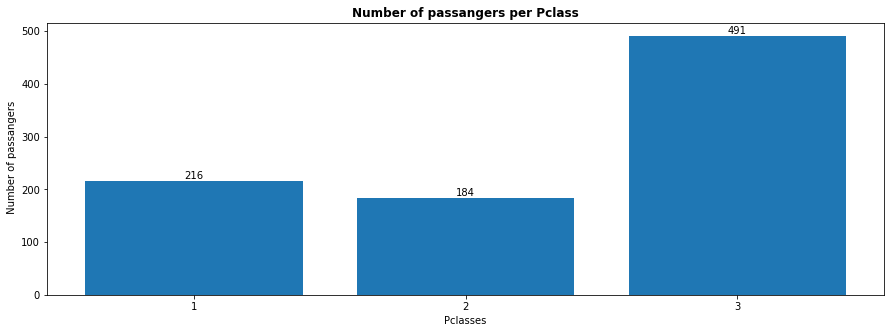

In [399]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of passangers per Pclass', fontweight="bold")
bars = ax.bar(train.Pclass.unique(), train.Pclass.value_counts(), tick_label=train.Pclass.unique())
plt.xlabel('Pclasses')
plt.ylabel(' Number of passangers')
ax.bar_label(bars)

# plt.bar(train.Pclass.unique(), train.Pclass.value_counts())
# plt.xticks(train.Pclass.unique())


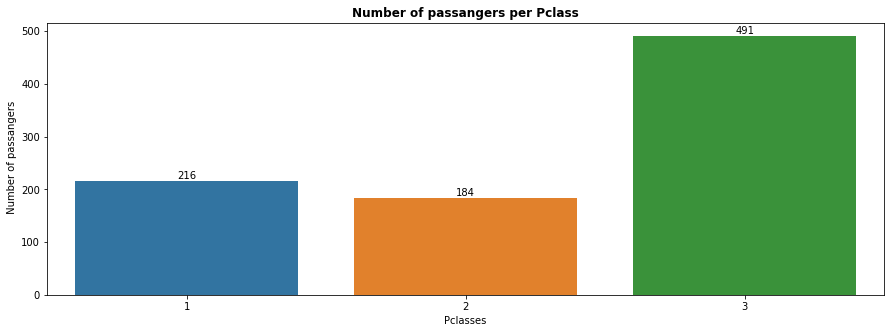

In [400]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of passangers per Pclass', fontweight="bold")
y = sns.countplot(x='Pclass', data=train)
plt.xlabel('Pclasses')
plt.ylabel(' Number of passangers')

y.bar_label(y.containers[0]);

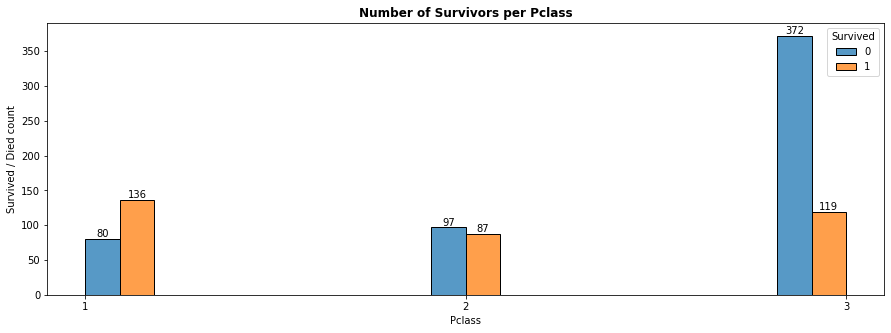

In [401]:
#sns.barplot(x='Pclass', y='Survived', hue='Survived', data=train)

fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of Survivors per Pclass', fontweight="bold")
y = sns.histplot(x='Pclass', hue='Survived', data=train, stat='count', multiple='dodge')
plt.xlabel('Pclass')
plt.ylabel('Survived / Died count')
plt.xticks(train.Pclass.unique())

labels1 = [str(v) if v else '' for v in y.containers[0].datavalues]
labels2 = [str(v) if v else '' for v in y.containers[1].datavalues]

y.bar_label(y.containers[0], labels=labels1)
y.bar_label(y.containers[1], labels=labels2);

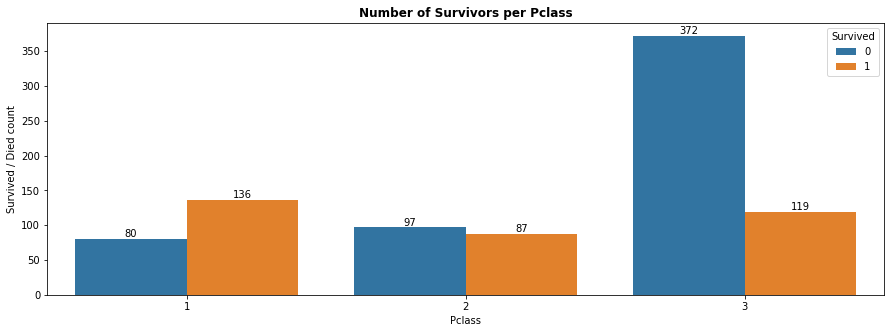

In [402]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of Survivors per Pclass', fontweight="bold")

y=sns.countplot(x='Pclass', hue='Survived', data=train)
plt.xlabel('Pclass')
plt.ylabel('Survived / Died count')

y.bar_label(y.containers[0])
y.bar_label(y.containers[1]);

### <b> Name </b>

In [403]:
train['LastName'] = train.Name.str.split(',', expand=True)[0]
train['PassengerTitle'] = (train.Name.str.split(',', expand=True)[1].str.split('.', expand=True)[0]).str.strip()

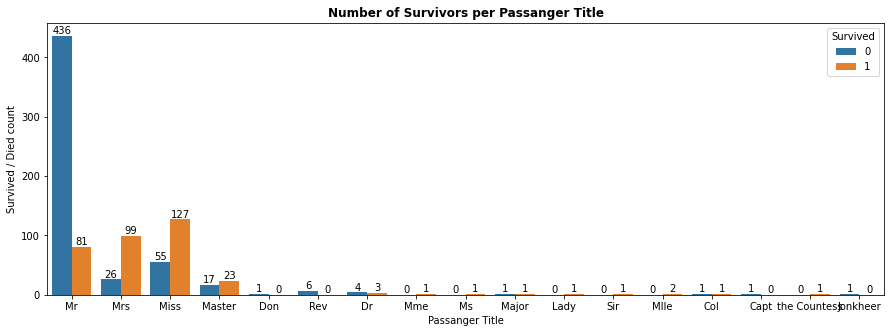

In [404]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of Survivors per Passanger Title', fontweight="bold")

y=sns.countplot(x='PassengerTitle', hue='Survived', data=train)
plt.xlabel('Passanger Title')
plt.ylabel('Survived / Died count')

y.bar_label(y.containers[0])
y.bar_label(y.containers[1]);

In [405]:
# Regroup Passanger Titles as Other
train.loc[~((train['PassengerTitle'].str.contains('Mrs')) | 
            (train['PassengerTitle'].str.contains('Miss')) | 
            (train['PassengerTitle'].str.contains('Mr')) | 
            (train['PassengerTitle'].str.contains('Master'))), 'PassengerTitle'  ] = 'Others'

train.PassengerTitle.value_counts()


Mr        517
Miss      182
Mrs       125
Master     40
Others     27
Name: PassengerTitle, dtype: int64

In [406]:
# Drop the name column as its of no use now
train.drop(['Name', 'LastName'], axis=1, inplace=True)

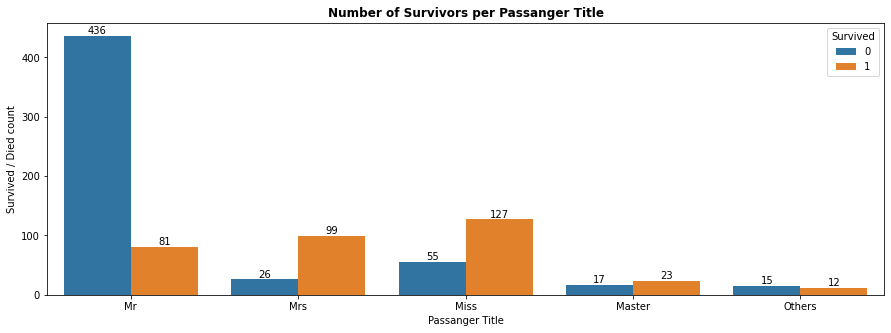

In [407]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title('Number of Survivors per Passanger Title', fontweight="bold")

y=sns.countplot(x='PassengerTitle', hue='Survived', data=train)
plt.xlabel('Passanger Title')
plt.ylabel('Survived / Died count')

y.bar_label(y.containers[0])
y.bar_label(y.containers[1]);

### <b>Sex</b>

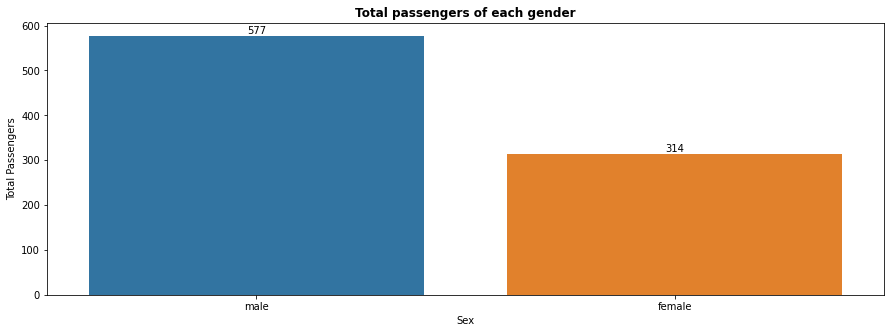

In [421]:
plt.figure(figsize = (15, 5))
plt.title('Total passengers of each gender', fontweight="bold")
y = sns.countplot(x='Sex', data=train)
plt.ylabel('Total Passengers')
y.bar_label(y.containers[0]);

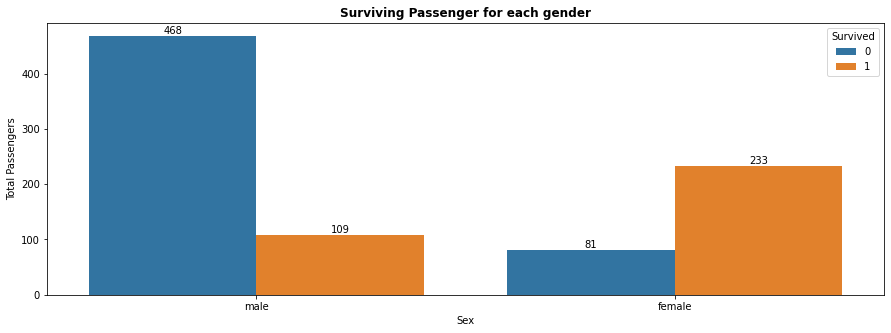

In [420]:
plt.figure(figsize = (15, 5))
plt.title('Surviving Passenger for each gender', fontweight="bold")
y = sns.countplot(x='Sex', hue='Survived', data=train)
plt.ylabel('Total Passengers')
y.bar_label(y.containers[0])
y.bar_label(y.containers[1]);

### <b>Age</b>

1. Outlier Treatment -> Use winsorization to replace last 99th percentile outlier. Use replacing technique instead of dropping the outlier here. 

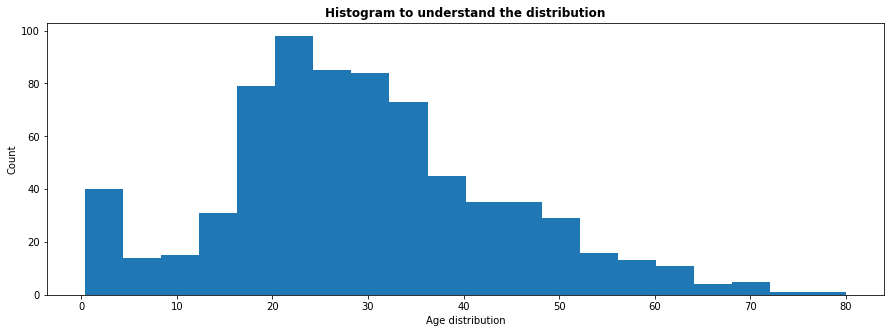

In [509]:
# Histogram to understand the distribution

plt.figure(figsize = (15, 5))
plt.title("Histogram to understand the distribution", fontweight='bold')
plt.xlabel('Age distribution')
plt.ylabel('Count')
plt.hist(train.Age, bins=20);
plt.show()

# Boxplot to understand distribution and check if there are outliers
plt.figure(figsize = (15,5))
plt.title("Boxplot to understand the distribution for each target variable", fontweight='bold')
plt.xlabel('Survived / Not-Survived')
plt.ylabel('Age')
sns.boxplot(y='Age', x='Survived', data=train)
plt.show()

In [430]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,male,NaN,0,0,2629,7.2292,NaN,C,Mr
863,864,0,3,female,NaN,8,2,CA. 2343,69.5500,NaN,S,Miss
868,869,0,3,male,NaN,0,0,345777,9.5000,NaN,S,Mr
878,879,0,3,male,NaN,0,0,349217,7.8958,NaN,S,Mr


In [442]:
#train[train.PassengerTitle == 'Miss'].sort_values('Age', ascending=False)['Age'].hist()
train[(train.PassengerTitle == 'Miss') & (~train.Age.isnull())]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
10,11,1,3,female,4.0,1,1,PP 9549,16.7000,G6,S,Miss
11,12,1,1,female,58.0,0,0,113783,26.5500,C103,S,Miss
14,15,0,3,female,14.0,0,0,350406,7.8542,NaN,S,Miss
22,23,1,3,female,15.0,0,0,330923,8.0292,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...
853,854,1,1,female,16.0,0,1,PC 17592,39.4000,D28,S,Miss
866,867,1,2,female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C,Miss
875,876,1,3,female,15.0,0,0,2667,7.2250,NaN,C,Miss
882,883,0,3,female,22.0,0,0,7552,10.5167,NaN,S,Miss


In [451]:
# Outliers
train[~train.Age.isnull()].Age.apply(lambda x: float(x)).quantile(0.99)

65.87

In [452]:
train[~train.Age.isnull()].Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [462]:
train[~train.Age.isnull()].sort_values('Age').head(20)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
803,804,1,3,male,0.42,0,1,2625,8.5167,NaN,C,Master
755,756,1,2,male,0.67,1,1,250649,14.5000,NaN,S,Master
644,645,1,3,female,0.75,2,1,2666,19.2583,NaN,C,Miss
469,470,1,3,female,0.75,2,1,2666,19.2583,NaN,C,Miss
78,79,1,2,male,0.83,0,2,248738,29.0000,NaN,S,Master
831,832,1,2,male,0.83,1,1,29106,18.7500,NaN,S,Master
305,306,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S,Master
827,828,1,2,male,1.00,0,2,S.C./PARIS 2079,37.0042,NaN,C,Master
381,382,1,3,female,1.00,0,2,2653,15.7417,NaN,C,Miss
164,165,0,3,male,1.00,4,1,3101295,39.6875,NaN,S,Master


In [469]:
train[train.Age >= np.percentile(train[~train.Age.isnull()].Age, 99)]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
33,34,0,2,male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Mr
96,97,0,1,male,71.0,0,0,PC 17754,34.6542,A5,C,Mr
116,117,0,3,male,70.5,0,0,370369,7.7500,NaN,Q,Mr
493,494,0,1,male,71.0,0,0,PC 17609,49.5042,NaN,C,Mr
630,631,1,1,male,80.0,0,0,27042,30.0000,A23,S,Mr
672,673,0,2,male,70.0,0,0,C.A. 24580,10.5000,NaN,S,Mr
745,746,0,1,male,70.0,1,1,WE/P 5735,71.0000,B22,S,Others
851,852,0,3,male,74.0,0,0,347060,7.7750,NaN,S,Mr


In [474]:
math.ceil(np.percentile(train[~train.Age.isnull()].Age, 99))

66

In [475]:
temp = train.copy()

In [484]:
train[train.Age > 66].index

Int64Index([96, 116, 493, 630, 672, 745, 851], dtype='int64')

In [485]:
temp.iloc(train[train.Age > 66].index)

TypeError: unhashable type: 'Int64Index'

In [490]:
temp.loc[temp[temp.Age] >= math.ceil(np.percentile(train[~train.Age.isnull()].Age, 99)), 'Age'))] = math.ceil(np.percentile(train[~train.Age.isnull()].Age, 99))

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (<ipython-input-490-5527dc5b9218>, line 1)

In [493]:
ceiling = math.ceil(np.percentile(train[~train.Age.isnull()].Age, 99))

temp.loc[temp.Age >= ceiling, 'Age'] = ceiling

In [495]:
temp[~(temp.Age.isnull())].sort_values('Age', ascending=False)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,PassengerTitle
493,494,0,1,male,66.00,0,0,PC 17609,49.5042,NaN,C,Mr
851,852,0,3,male,66.00,0,0,347060,7.7750,NaN,S,Mr
630,631,1,1,male,66.00,0,0,27042,30.0000,A23,S,Mr
96,97,0,1,male,66.00,0,0,PC 17754,34.6542,A5,C,Mr
672,673,0,2,male,66.00,0,0,C.A. 24580,10.5000,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
78,79,1,2,male,0.83,0,2,248738,29.0000,NaN,S,Master
644,645,1,3,female,0.75,2,1,2666,19.2583,NaN,C,Miss
469,470,1,3,female,0.75,2,1,2666,19.2583,NaN,C,Miss
755,756,1,2,male,0.67,1,1,250649,14.5000,NaN,S,Master


<AxesSubplot:xlabel='Survived', ylabel='Age'>

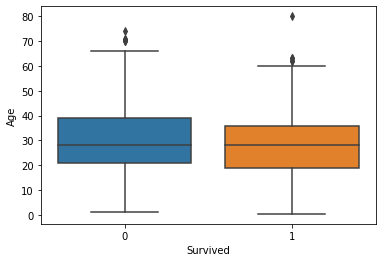

In [502]:
sns.boxplot(x='Survived', y='Age', data=train)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

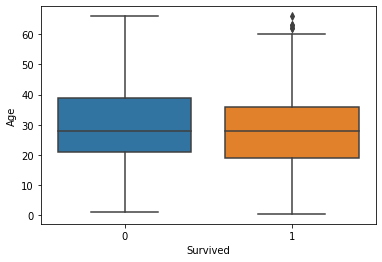

In [504]:
sns.boxplot(x='Survived', y='Age', data=temp)

In [184]:
train[train.Survived == 1].Pclass.value_counts().sort_index()

1    136
2     87
3    119
Name: Pclass, dtype: int64

In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [53]:
temp = train.sort_values('Age', ascending=False)

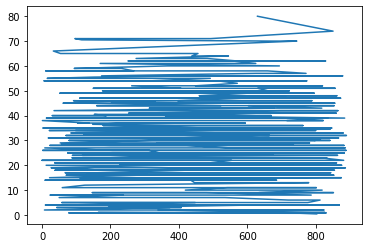

In [54]:
plt.plot(temp['Age'])

<AxesSubplot:xlabel='Age'>

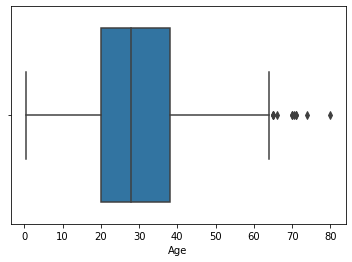

In [55]:
# Check if Age is normally distributed?
sns.boxplot(train['Age'])


In [47]:
stats, p = shapiro(train[~train.Age.isnull()]['Age'])

print('Stats = %.3f , p = %.3f ' % (stats,  p))

#Shapiro-Wilk Test assumes that distribution is not normal

Stats = 0.981 , p = 0.000 


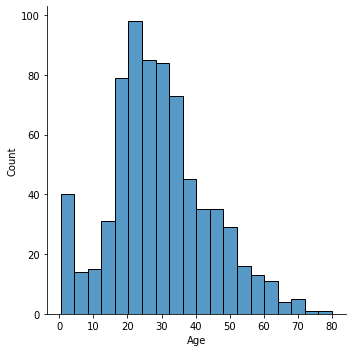

In [33]:
sns.displot(train['Age'])

In [30]:
measurements = np.random.normal(size=150)

<AxesSubplot:>

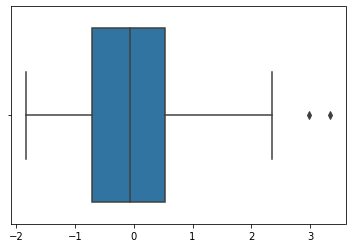

In [32]:
sns.boxplot(measurements)


In [73]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [72]:
train.drop('Cabin', axis=1, inplace=True)

In [74]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [82]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'], drop_first=True)

In [83]:
train

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


In [85]:
train.Ticket.nunique()

681

In [93]:
train[train.Ticket == '110465']

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
110,111,0,1,"Porter, Mr. Walter Chamberlain",47.0,0,0,110465,52.0,1,0,1
475,476,0,1,"Clifford, Mr. George Quincy",NaN,0,0,110465,52.0,1,0,1


In [101]:
temp = train[train.duplicated(subset=['Ticket'], keep=False)].sort_values('Ticket').reset_index()

In [104]:
temp.head(50)

,index,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,257,258,1,1,"Cherry, Miss. Gladys",30.00,0,0,110152,86.5000,0,0,1
1,759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",33.00,0,0,110152,86.5000,0,0,1
2,504,505,1,1,"Maioni, Miss. Roberta",16.00,0,0,110152,86.5000,0,0,1
3,262,263,0,1,"Taussig, Mr. Emil",52.00,1,1,110413,79.6500,1,0,1
4,558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",39.00,1,1,110413,79.6500,0,0,1
5,585,586,1,1,"Taussig, Miss. Ruth",18.00,0,2,110413,79.6500,0,0,1
6,110,111,0,1,"Porter, Mr. Walter Chamberlain",47.00,0,0,110465,52.0000,1,0,1
7,475,476,0,1,"Clifford, Mr. George Quincy",NaN,0,0,110465,52.0000,1,0,1
8,523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",44.00,0,1,111361,57.9792,0,0,0
9,329,330,1,1,"Hippach, Miss. Jean Gertrude",16.00,0,1,111361,57.9792,0,0,0
